In [ ]:
import os
# Find the latest version of spark 3.x  from http://www.apache.org/dist/spark/ and enter as the spark version
# For example:
# spark_version = 'spark-3.3.1'
spark_version = 'spark-3.4.0'
os.environ['SPARK_VERSION']=spark_version

# Install Spark and Java
!apt-get update
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget -q http://www.apache.org/dist/spark/$SPARK_VERSION/$SPARK_VERSION-bin-hadoop3.tgz
!tar xf $SPARK_VERSION-bin-hadoop3.tgz
!pip install -q findspark

# Set Environment Variables
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = f"/content/{spark_version}-bin-hadoop3"

# Start a SparkSession
import findspark
findspark.init()

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Hit:4 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:5 http://archive.ubuntu.com/ubuntu focal InRelease
Get:6 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Hit:7 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:9 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Get:11 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,255 kB]
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,354 kB]
Fetched 4,945 kB in 2s (2,11

In [ ]:
# Import packages
from pyspark.sql import SparkSession
import time

# Create a SparkSession
spark = SparkSession.builder.appName("CSV Import").getOrCreate()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
csv_path = "/content/drive/MyDrive/balanced 50"

In [ ]:
df = spark.read.csv(csv_path, header=True, inferSchema=True)

In [ ]:
df.printSchema()

root
 |-- Diabetes_binary: double (nullable = true)
 |-- HighBP: double (nullable = true)
 |-- HighChol: double (nullable = true)
 |-- CholCheck: double (nullable = true)
 |-- BMI: double (nullable = true)
 |-- Smoker: double (nullable = true)
 |-- Stroke: double (nullable = true)
 |-- HeartDiseaseorAttack: double (nullable = true)
 |-- PhysActivity: double (nullable = true)
 |-- Fruits: double (nullable = true)
 |-- Veggies: double (nullable = true)
 |-- HvyAlcoholConsump: double (nullable = true)
 |-- AnyHealthcare: double (nullable = true)
 |-- NoDocbcCost: double (nullable = true)
 |-- GenHlth: double (nullable = true)
 |-- MentHlth: double (nullable = true)
 |-- PhysHlth: double (nullable = true)
 |-- DiffWalk: double (nullable = true)
 |-- Sex: double (nullable = true)
 |-- Age: double (nullable = true)
 |-- Education: double (nullable = true)
 |-- Income: double (nullable = true)



In [ ]:
df.createOrReplaceTempView("diabetes")

In [ ]:
columns = df.columns

In [ ]:
for column in columns:
    result = spark.sql(f"SELECT {column}, COUNT(*) AS count FROM diabetes GROUP BY {column}")
    result.show()


+---------------+-----+
|Diabetes_binary|count|
+---------------+-----+
|            0.0|35346|
|            1.0|35346|
+---------------+-----+

+------+-----+
|HighBP|count|
+------+-----+
|   0.0|30860|
|   1.0|39832|
+------+-----+

+--------+-----+
|HighChol|count|
+--------+-----+
|     0.0|33529|
|     1.0|37163|
+--------+-----+

+---------+-----+
|CholCheck|count|
+---------+-----+
|      0.0| 1749|
|      1.0|68943|
+---------+-----+

+----+-----+
| BMI|count|
+----+-----+
|67.0|    8|
|70.0|    5|
|69.0|    4|
|49.0|  195|
|98.0|    4|
|29.0| 4219|
|75.0|    9|
|64.0|    9|
|47.0|  272|
|42.0|  686|
|44.0|  456|
|35.0| 2107|
|62.0|   18|
|18.0|  366|
|86.0|    1|
|80.0|    1|
|39.0| 1189|
|37.0| 1607|
|34.0| 2564|
|25.0| 4031|
+----+-----+
only showing top 20 rows

+------+-----+
|Smoker|count|
+------+-----+
|   0.0|37094|
|   1.0|33598|
+------+-----+

+------+-----+
|Stroke|count|
+------+-----+
|   0.0|66297|
|   1.0| 4395|
+------+-----+

+--------------------+-----+
|He

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import sklearn as skl
import matplotlib as plt
import tensorflow as tf


In [ ]:
df1 = spark.sql("SELECT * FROM diabetes")
dfdbpandas=df1.toPandas()
dfdbpandas

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
70688,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
70689,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
70690,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
# Separate the data into labels and features

# Separate the y variable, the labels
y=dfdbpandas['Diabetes_binary']

# Separate the X variable, the features
X=dfdbpandas.drop('Diabetes_binary',axis=1)



In [ ]:
# Review the X variable DataFrame
X.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
X.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [ ]:
# Review the y variable DataFrame
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Diabetes_binary, dtype: float64

In [ ]:
# Check the balance of our target values
y.value_counts()

0.0    35346
1.0    35346
Name: Diabetes_binary, dtype: int64

In [ ]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [ ]:
X_train_scaled[0]

array([-1.14099572, -1.05681832,  0.15910453, -0.82462428,  1.05254924,
       -0.25808719, -0.41806708,  0.64861177,  0.79432511,  0.51774842,
       -0.21241758,  0.21645932, -0.32022051, -0.75460552, -0.45921287,
       -0.58065251, -0.58540163,  1.08655213,  0.49266082,  1.0485886 ,
        1.05907539])

In [ ]:
X_test_scaled[0]

array([ 0.87642748, -1.05681832,  0.15910453,  0.01869483, -0.95007432,
       -0.25808719, -0.41806708,  0.64861177,  0.79432511,  0.51774842,
       -0.21241758, -4.61980566, -0.32022051, -1.65095212, -0.45921287,
       -0.58065251, -0.58540163,  1.08655213, -2.67775896,  0.07535285,
       -1.69931225])

In [ ]:
# Create a method that creates a new Sequential model with hyperparameter options
input_dimension = X_train_scaled.shape[1]

def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=10,
        step=2), activation=activation, input_dim=input_dimension))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=10,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [ ]:
 !pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import sklearn as skl
import matplotlib as plt
import tensorflow as tf

In [ ]:
import keras_tuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=100,
    overwrite=True,
    hyperband_iterations=2)

In [ ]:

# Run the kerastuner search for best hyperparameters
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 80 Complete [00h 00m 17s]
val_accuracy: 0.7493351697921753

Best val_accuracy So Far: 0.7531828284263611
Total elapsed time: 00h 18m 30s

Search: Running Trial #81

Value             |Best Value So Far |Hyperparameter
relu              |relu              |activation
3                 |5                 |first_units
6                 |2                 |num_layers
1                 |7                 |units_0
9                 |7                 |units_1
5                 |3                 |units_2
7                 |9                 |units_3
3                 |3                 |units_4
3                 |7                 |units_5
2                 |2                 |tuner/epochs
0                 |0                 |tuner/initial_epoch
4                 |4                 |tuner/bracket
0                 |0                 |tuner/round

Epoch 1/2


Exception ignored in: <function _xla_gc_callback at 0x7ff7ee119990>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 104, in _xla_gc_callback
    xla_client._xla.collect_garbage()
KeyboardInterrupt: 


1657/1657 [==============================] - 7s 3ms/step - loss: 0.6932 - accuracy: 0.5008 - val_loss: 0.6933 - val_accuracy: 0.4957
Epoch 2/2
 793/1657 [=============>................] - ETA: 2s - loss: 0.6932 - accuracy: 0.4996

KeyboardInterrupt: ignored

In [ ]:
# Get best model hyperparameters
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'relu',
 'first_units': 5,
 'num_layers': 2,
 'units_0': 7,
 'units_1': 7,
 'units_2': 3,
 'units_3': 9,
 'units_4': 3,
 'units_5': 7,
 'tuner/epochs': 2,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 4,
 'tuner/round': 0}

In [ ]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
print(best_model.summary())
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 110       
                                                                 
 dense_1 (Dense)             (None, 7)                 42        
                                                                 
 dense_2 (Dense)             (None, 7)                 56        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________
None
553/553 - 1s - loss: 0.5081 - accuracy: 0.7532 - 855ms/epoch - 2ms/step
Loss: 0.508065938949585, Accuracy: 0.7531828284263611


In [ ]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=9, activation="relu", input_dim=input_dimension))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="relu"))

# Compile the Sequential model together and customize metrics
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Train the model
fit_model = nn.fit(X_train_scaled, y_train, epochs=50)

# Check the structure of the model
nn.summary()

Epoch 1/50
1657/1657 [==============================] - 4s 2ms/step - loss: 2.3767 - accuracy: 0.5884
Epoch 2/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.6863 - accuracy: 0.6784
Epoch 3/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.6121 - accuracy: 0.7013
Epoch 4/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5698 - accuracy: 0.7272
Epoch 5/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5581 - accuracy: 0.7382
Epoch 6/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5419 - accuracy: 0.7441
Epoch 7/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.5290 - accuracy: 0.7484
Epoch 8/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5192 - accuracy: 0.7501
Epoch 9/50
1657/1657 [==============================] - 4s 2ms/step - loss: 0.5130 - accuracy: 0.7500
Epoch 10/50
1657/1657 [==============================] - 3s 2ms/step - loss: 0.509

In [ ]:
# Export our model to HDF5 file
best_model.save('diabetes_model-1.h5')

In [ ]:
training_process = pd.DataFrame(fit_model.history)

# observe the training process by each epoch
training_process.index += 1

<Axes: >

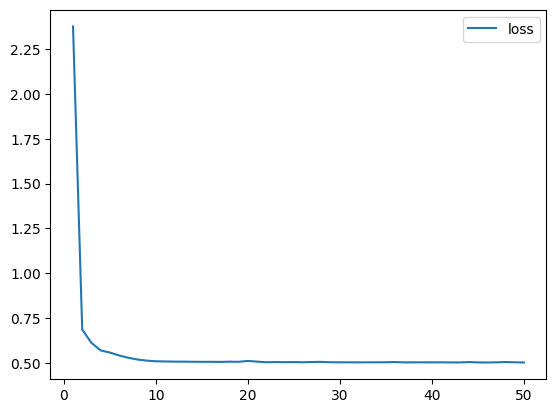

In [ ]:
training_process.plot(y='loss')

<Axes: >

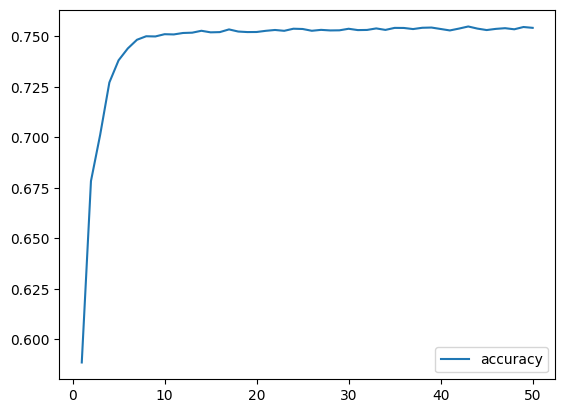

In [ ]:
training_process.plot(y='accuracy')